# Other Considerations in the Regression Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [2]:
# Importing the Credit dataset
credit = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/Credit.csv')
credit.describe()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [3]:
# Removing the first column
credit.drop('Unnamed: 0', axis=1, inplace=True)


In [4]:
# Have a look at the first few rows of the data
credit.head(2)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


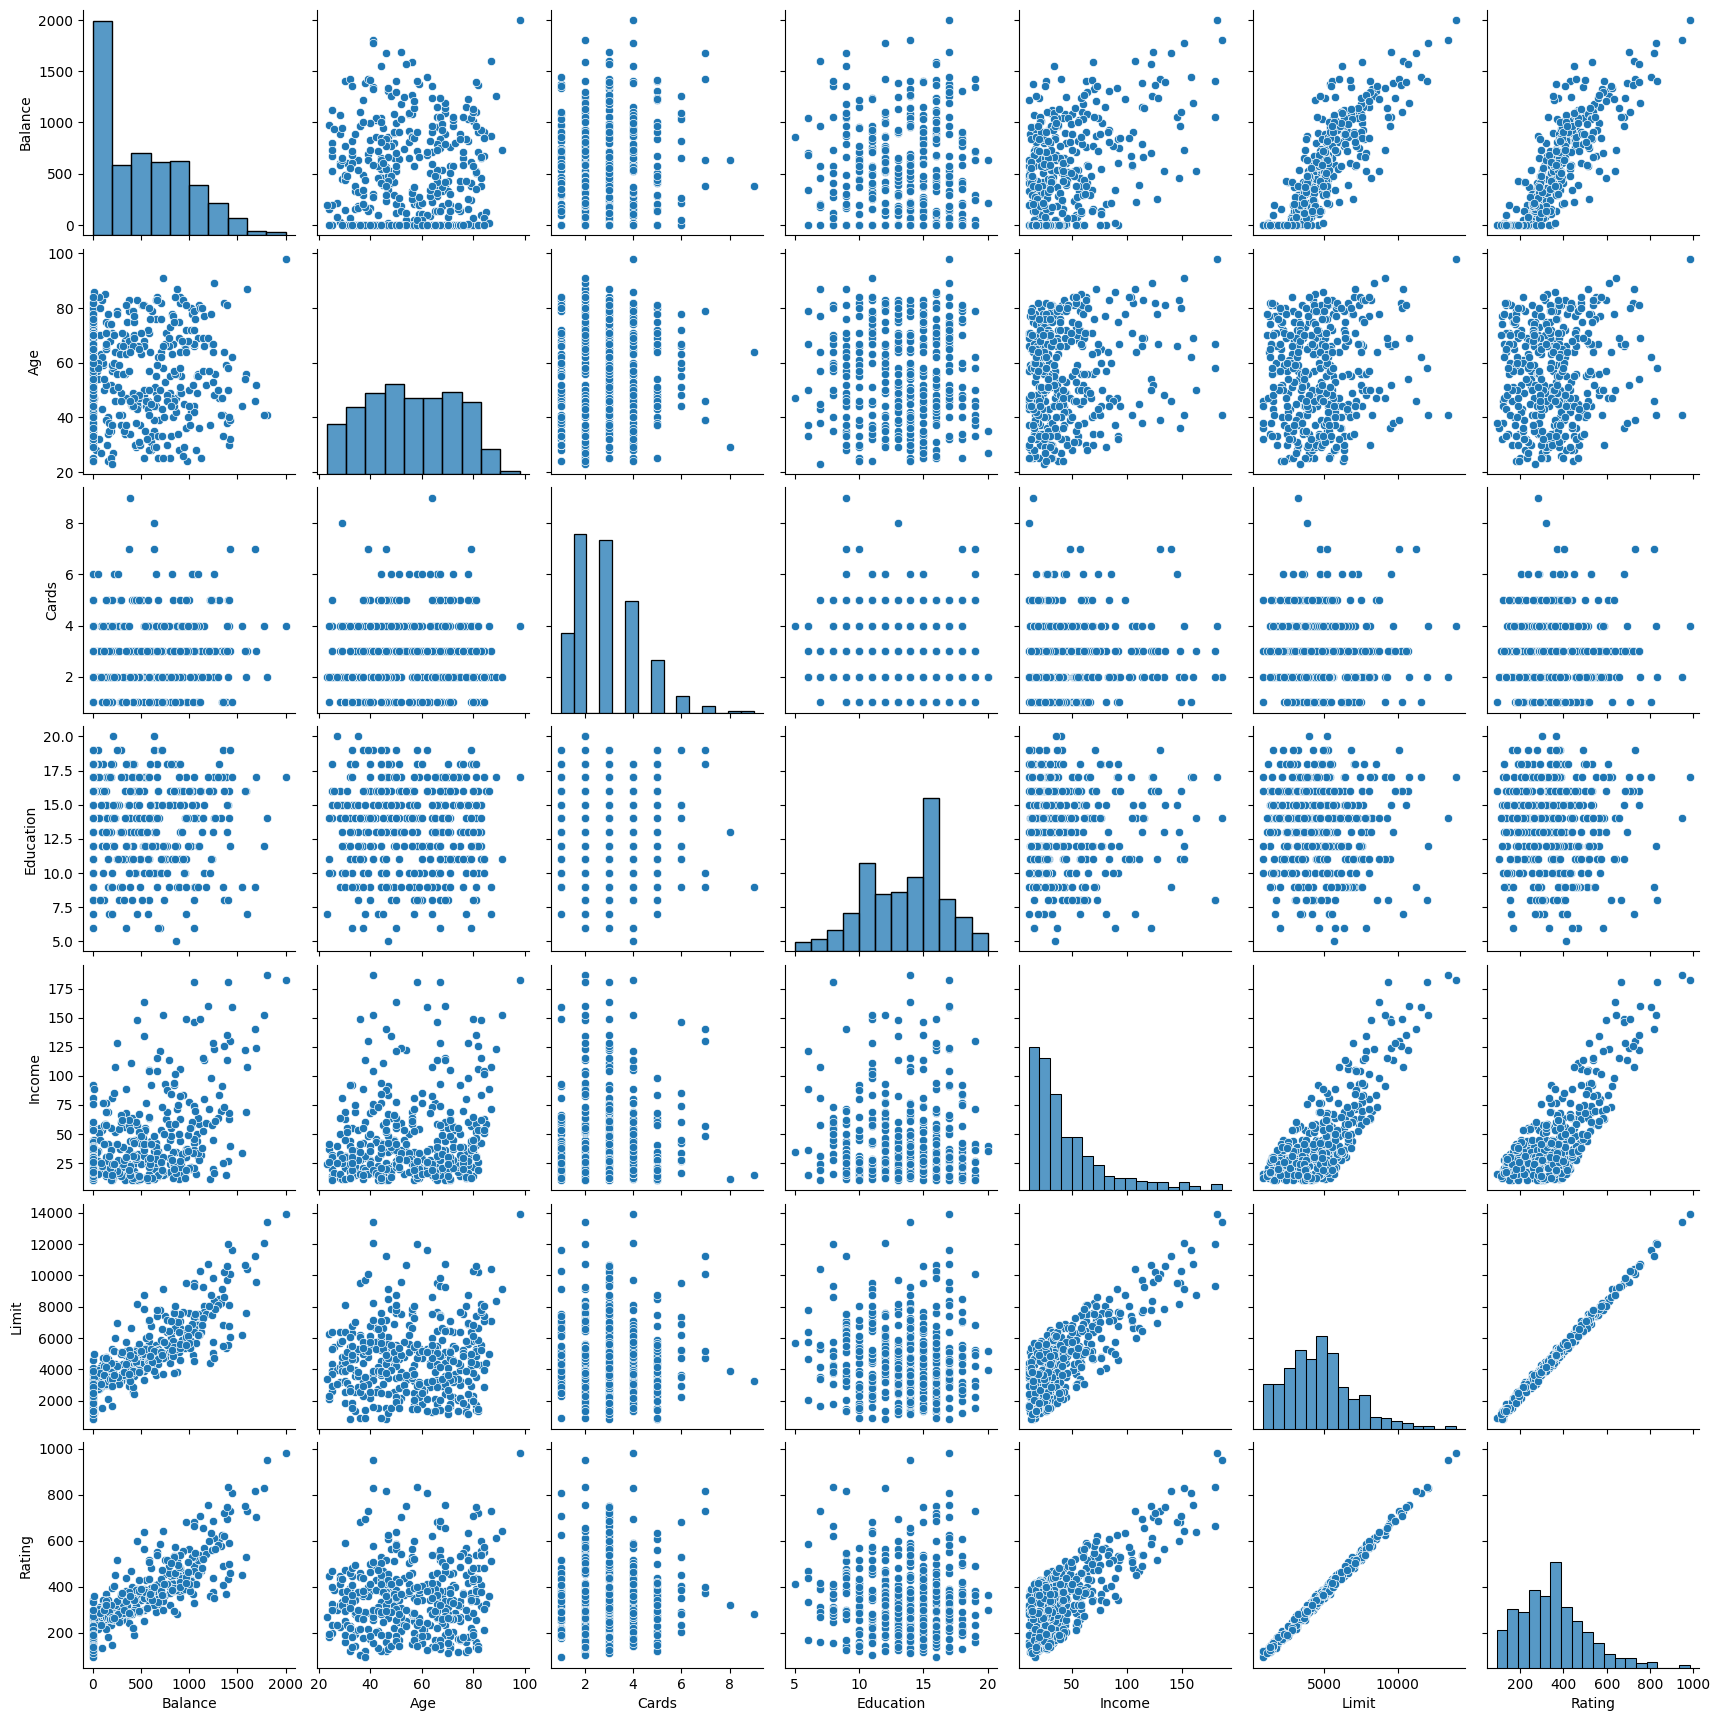

In [6]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])


In [7]:
# Parameters estimation with statsmodels on a dummy variable
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


In [8]:
est = smf.ols("Balance ~ C(Gender, Treatment(reference='Female'))", credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,529.5362,31.988,16.554,0.000,466.649,592.423
"C(Gender, Treatment(reference='Female'))[T. Male]",-19.7331,46.051,-0.429,0.669,-110.267,70.801


In [9]:
print(credit.Ethnicity.unique())


['Caucasian' 'Asian' 'African American']


In [10]:
# Parameters estimation with statsmodels on a multiple dummy variables
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


# Interaction beetween qualitative and quantitative variables

In [11]:
# Mapping the values of the Student column to 0 and 1
credit['Student_enc'] = credit['Student'].apply(lambda x: 1 if x == 'Yes' else 0)
credit.head(3)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student_enc
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


In [12]:
# Regression 1: Linear model without interaction term
# This model includes 'Income' and 'Student2' as independent variables to predict 'Balance'.
est1 = smf.ols('Balance ~ Income + Student_enc', credit).fit()
regr1 = est1.params  # Extracts the estimated coefficients

# Regression 2: Linear model with interaction term
# This model includes 'Income', 'Student2', and the interaction term 'Income*Student2'.
# The interaction term allows the effect of 'Income' on 'Balance' to vary depending on 'Student2'.
est2 = smf.ols('Balance ~ Income + Income*Student_enc', credit).fit()
regr2 = est2.params  # Extracts the estimated coefficients

# Print results of the first regression (without interaction)
print('Regression 1 - without interaction term')
print(regr1)

# Print results of the second regression (with interaction)
print('\nRegression 2 - with interaction term')
print(regr2)


Regression 1 - without interaction term
Intercept      211.142964
Income           5.984336
Student_enc    382.670539
dtype: float64

Regression 2 - with interaction term
Intercept             200.623153
Income                  6.218169
Student_enc           476.675843
Income:Student_enc     -1.999151
dtype: float64


In [13]:
# Round the results to 2 decimal places
rounded_regr1 = regr1.round(2)
rounded_regr2 = regr2.round(2)


In [14]:
# Create a DataFrame to compare the two models
comparison_df = pd.DataFrame({
    'Model': ['Standard model', 'Interaction model'],
    'Intercept': [rounded_regr1.iloc[0], rounded_regr2.iloc[0]],
    'Income': [rounded_regr1.iloc[1], rounded_regr2.iloc[1]],
    'Student': [rounded_regr1.iloc[2], rounded_regr2.iloc[2]],
    'Income*Student': [None, rounded_regr2.iloc[3]]
})

comparison_df.T

,0,1
Model,Standard model,Interaction model
Intercept,211.14,200.62
Income,5.98,6.22
Student,382.67,476.68
Income*Student,NaN,-2.0


## 📊 Interpretation of Regression Results

### **Regression 1 - Without Interaction Term**
- The **Intercept (211.14)** represents the predicted balance when both **Income = 0** and **Student2 = 0**.
- **Income (5.98)**: For each additional unit of income, the predicted balance increases by **5.98**.
- **Student2 (382.67)**: Being a student increases the balance by **382.67**, regardless of income.

### **Regression 2 - With Interaction Term**
- The **Intercept (200.62)** is slightly lower compared to Regression 1.
- **Income (6.22)**: The effect of income on balance is slightly stronger in this model.
- **Student2 (476.68)**: The base effect of being a student is higher compared to the first model.
- **Income:Student2 (-2.0)**: The negative interaction term suggests that the relationship between income and balance is **weaker for students**. This means that **the effect of income on balance is different for students compared to non-students**.

### **Key Takeaways**
- In **Regression 1**, the model assumes that income has the **same effect** on balance for both students and non-students.
- In **Regression 2**, the interaction term allows income to have a **different effect** depending on whether the person is a student.
- The **negative interaction term (-1.99)** indicates that the impact of income on balance is **less pronounced for students** compared to non-students.
- This suggests that including an interaction term improves the model by capturing differences in income effects across groups.


In [15]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Sun, 11 May 2025   Prob (F-statistic):           4.94e-28
Time:                        09:03:51   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            200.6232     33.698      5.953      0.000     134.373     266.873
Income                 6.2182      0.592     10.502      0.000       5.054       7.382
Student_enc          476.6758    104.351      4.568      0.000     271.524     681.827
Income:Student_enc    -1.9992      1.731     -1.155      0.249      -5.403       1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

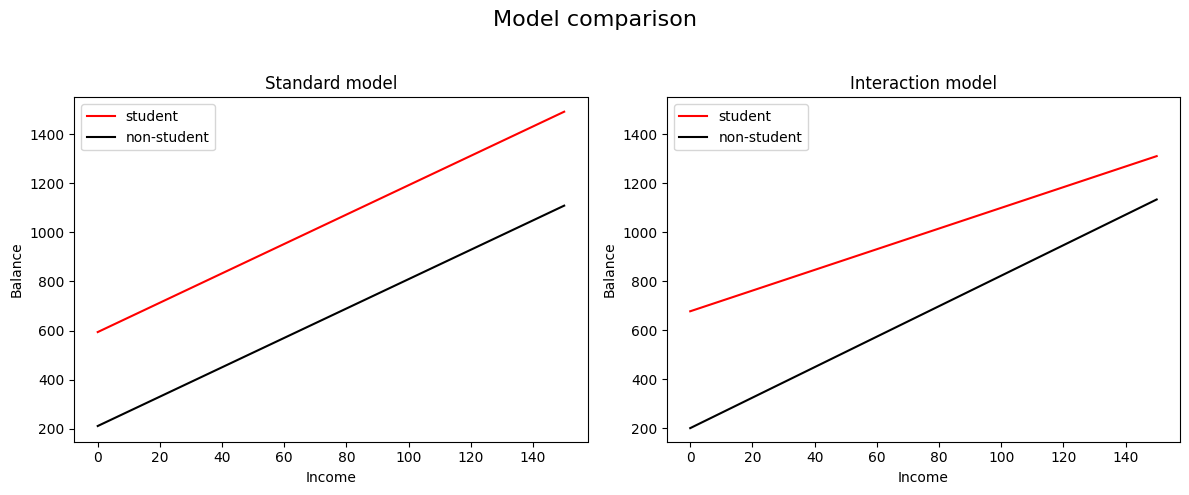

In [16]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student_enc'],
                       regr1['Intercept']+regr1['Student_enc']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student_enc'],
                       regr2['Intercept']+regr2['Student_enc']+
                       150*(regr2['Income']+regr2['Income:Student_enc']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)
fig.axes[0].title.set_text('Standard model')
fig.axes[1].title.set_text('Interaction model')
fig.suptitle('Model comparison', fontsize=16)

# Adjust layout so that the suptitle does not overlap with subplots
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [17]:
comparison_df.T

,0,1
Model,Standard model,Interaction model
Intercept,211.14,200.62
Income,5.98,6.22
Student,382.67,476.68
Income*Student,NaN,-2.0
